![Logo](https://i.ibb.co/ssGm4KW/LC-Logo-Official-min-1100x200.png)


# About the Compnay

LendingClub, headquartered in San Francisco, California, has been a pioneering force in the peer-to-peer lending industry since its establishment in 2006. Renowned as one of the largest online marketplace lending platforms in the United States, LendingClub facilitates a unique lending ecosystem where borrowers can secure loans and investors can purchase notes backed by loan payments.

The platform offers a streamlined process for borrowers seeking financing, catering to individuals and small businesses alike. Borrowers can submit loan applications online, specifying their financial needs, whether for debt consolidation, home improvement, medical expenses, or small business ventures. This accessibility empowers borrowers to pursue their financial goals with ease.

Investors, ranging from individuals to institutional entities, play a crucial role in funding loans through LendingClub's platform. By purchasing notes associated with specific loans, investors can strategically allocate their funds based on factors like credit score, loan purpose, and borrower information, thereby diversifying their investment portfolios.

Central to LendingClub's operations is its rigorous risk assessment mechanism. Utilizing a proprietary credit scoring model, LendingClub evaluates borrower creditworthiness by analyzing diverse factors such as credit history, income, employment status, and debt-to-income ratio. This meticulous assessment ensures prudent lending practices and enhances investor confidence in the platform.

# Goal of the Project

In this project, I aim to conduct exploratory data analysis on the dataset at hand. Additionally, I plan to develop a machine learning model with the objective of predicting loan defaults accuracy.


# 👉 Section 1 - Data Analysis 


## About the Dataset


Link to the **[dataset](https://www.kaggle.com/datasets/urstrulyvikas/lending-club-loan-data-analysis)**

This dataset was downloaded from Kaggle and comprises historical data spanning from 2007 to 2015. It consists of 9578 rows of data and encompasses 14 variables consisting of 13 numerical variables and 1 categorical variable.

### Dataset columns and definition

- **credit.policy:** 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.

- **purpose:** The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").

- **int.rate:** The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.

- **installment:** The monthly installments owed by the borrower if the loan is funded.

- **log.annual.inc:** The natural log of the self-reported annual income of the borrower.

- **dti:** The debt-to-income ratio of the borrower (amount of debt divided by annual income).

- **fico:** The FICO credit score of the borrower.

- **days.with.cr.line:** The number of days the borrower has had a credit line.

- **revol.bal:** The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).

- **revol.util:** The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).

- **inq.last.6mths:** The borrower's number of inquiries by creditors in the last 6 months.

- **delinq.2yrs:** The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

- **pub.rec:** The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).



## Exploratory Data Analysis 



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
from matplotlib import style
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
df = pd.read_csv("A:\Project X\Data Science\Projects\Lending Club\loan_data.csv")
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


### Understanding the dataset

In [3]:
# Shape of the df

df.shape

(9578, 14)

🔴 As shown above, the dataset has a total of 9578 rows and 14 column

In [4]:
# Summery of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
# Check missing value

df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

🔴 As shown above, the dataframe does not have any missing values. We have one categorical value column 'Purpose'.

In [6]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


🔴 This provides a summary of valuable insights into the data. 

### Data Pre Processing

In [7]:
new_column_names = {
    'credit.policy' : 'Credit_Policy',
    'purpose' : 'Purpose',
    'int.rate' : 'Interest',
    'installment' : 'Installment',
    'log.annual.inc' : 'Annual_Income',
    'dti' : 'Debt_to_Income',
    'fico' : 'FICO',
    'days.with.cr.line' : 'Days_Creadit_Line',
    'revol.bal' : 'Unpaid_Balance',
    'revol.util' : 'Credit_Line_Used',
    'inq.last.6mths' : 'Inq_By_Creditors',
    'delinq.2yrs' : '30+_Due',
    'pub.rec' : 'Bad_Public_Rec',
    'not.fully.paid' : 'Not_Fully_Paid'}

df = df.rename(columns = new_column_names)
df.head()

,Credit_Policy,Purpose,Interest,Installment,Annual_Income,Debt_to_Income,FICO,Days_Creadit_Line,Unpaid_Balance,Credit_Line_Used,Inq_By_Creditors,30+_Due,Bad_Public_Rec,Not_Fully_Paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


🔴 Renamed columns for better understanding contain data

In [8]:
le = LabelEncoder()
df['Purpose_Encoded'] = le.fit_transform(df['Purpose'])

mapped_values = dict(zip(le.classes_, le.transform(le.classes_)))
print(mapped_values)

{'all_other': 0, 'credit_card': 1, 'debt_consolidation': 2, 'educational': 3, 'home_improvement': 4, 'major_purchase': 5, 'small_business': 6}


🔴 These are the mapping values we received after encoding the categorical column (Purpose)

In [9]:
df[['Purpose', 'Purpose_Encoded']].head()

,Purpose,Purpose_Encoded
0,debt_consolidation,2
1,credit_card,1
2,debt_consolidation,2
3,debt_consolidation,2
4,credit_card,1


### EDA

Text(0, 0.5, 'Number of Loans')

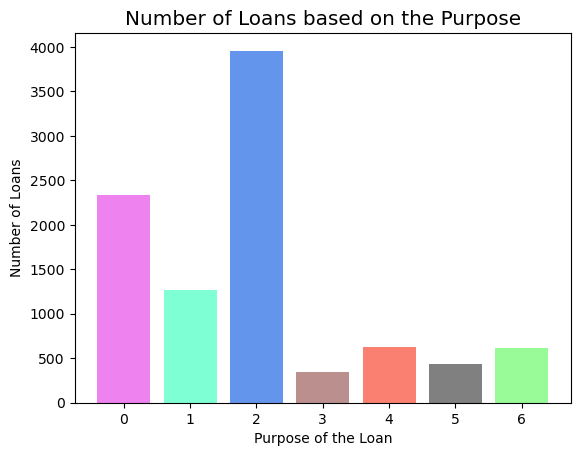

In [10]:
# Number of Loans based on the purpose

value_counts = df['Purpose_Encoded'].value_counts()
colors = ['cornflowerblue', 'violet', 'aquamarine', 'salmon', 'palegreen', 'gray', 'rosybrown']
plt.bar(value_counts.index, value_counts.values, color = colors)

style.use('ggplot')
plt.title('Number of Loans based on the Purpose')
plt.xlabel('Purpose of the Loan')
plt.ylabel('Number of Loans')

In [11]:
# As percentages

value_counts = df['Purpose'].value_counts()
percentage_values = (value_counts / len(df)) * 100

print(percentage_values)

debt_consolidation    41.313427
all_other             24.337022
credit_card           13.176028
home_improvement       6.567133
small_business         6.462727
major_purchase         4.562539
educational            3.581123
Name: Purpose, dtype: float64


🔴 Based on the above visualization:

- The highest number of loans were taken for debt consolidation, accounting for **41%** of the total number of loans.
- The second largest purpose is the "All Other" category, comprising **24%** of the total.
- **Educational purposes** represent the least common reason borrowers apply for loans.

([<matplotlib.axis.XTick at 0x1b0b01c1ed0>,
 [Text(0, 0, 'Fully Paid - 0'), Text(1, 0, 'Not Fully Paid - 1')])

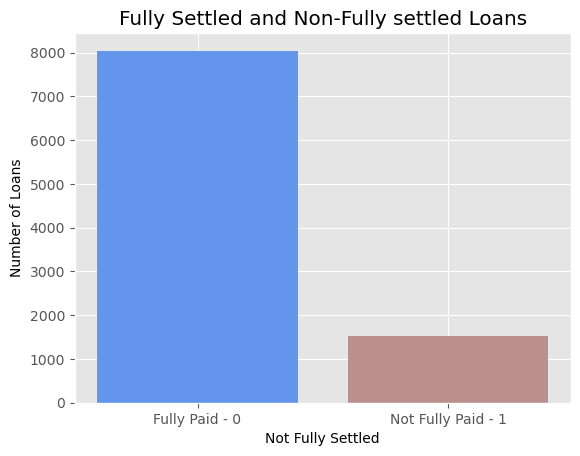

In [12]:
# Analysis of loan settlements

value_counts = df['Not_Fully_Paid'].value_counts()
colors = ['cornflowerblue', 'rosybrown']
plt.bar(value_counts.index, value_counts.values, color = colors)

style.use('ggplot')
plt.title('Fully Settled and Non-Fully settled Loans')
plt.xlabel('Not Fully Settled')
plt.ylabel('Number of Loans')
plt.xticks(value_counts.index, ['Fully Paid - 0', 'Not Fully Paid - 1'])

In [13]:
# As percentage

value_counts = df['Not_Fully_Paid'].value_counts()
percentage_values = (value_counts / len(df)) * 100
print(percentage_values)              

0    83.994571
1    16.005429
Name: Not_Fully_Paid, dtype: float64


🔴 According to the above analysis:

- Approximately **84%** of the loans were fully paid, indicating a positive sign of loan repayment.
- Approximately **16%** of the loans were not fully paid.

Text(0.5, 1.0, 'Distribution of Not Fully Paid vs FICO')

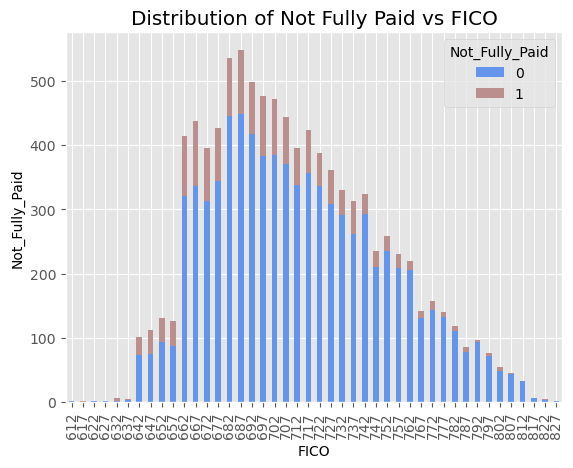

In [14]:
# Relationship between FICO score and the number of borrowers who settled their loans

grouped_data = df.groupby(['FICO', 'Not_Fully_Paid']).size().unstack(fill_value=0)
grouped_data.plot(kind='bar', stacked=True, color = ['cornflowerblue', 'rosybrown'])

plt.xlabel('FICO')
plt.ylabel('Not_Fully_Paid')
plt.title('Distribution of Not Fully Paid vs FICO')

🔴 This bar chart represents the relationship between FICO score and the number of borrowers who have not settled their loans. As the FICO score increases, the number of borrowers who have not settled their loans decreases. FICO rating is a valuable factor when assessing the creditworthiness of borrowers.

Text(0.5, 1.0, 'Intereset Rate vs FICO Score')

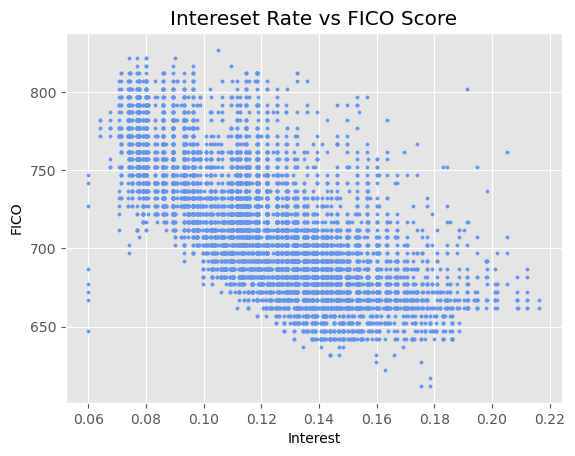

In [15]:
# FICO score and Intereset Rates

df.plot.scatter(x = 'Interest', y = 'FICO', s = 5, c = 'cornflowerblue')

plt.title('Intereset Rate vs FICO Score')

🔴 There is a negative correlation between these two factors: as the FICO score increases, the interest rate decreases. This suggests that financial institutions tend to place more trust in individuals with higher credit scores.

<Axes: >

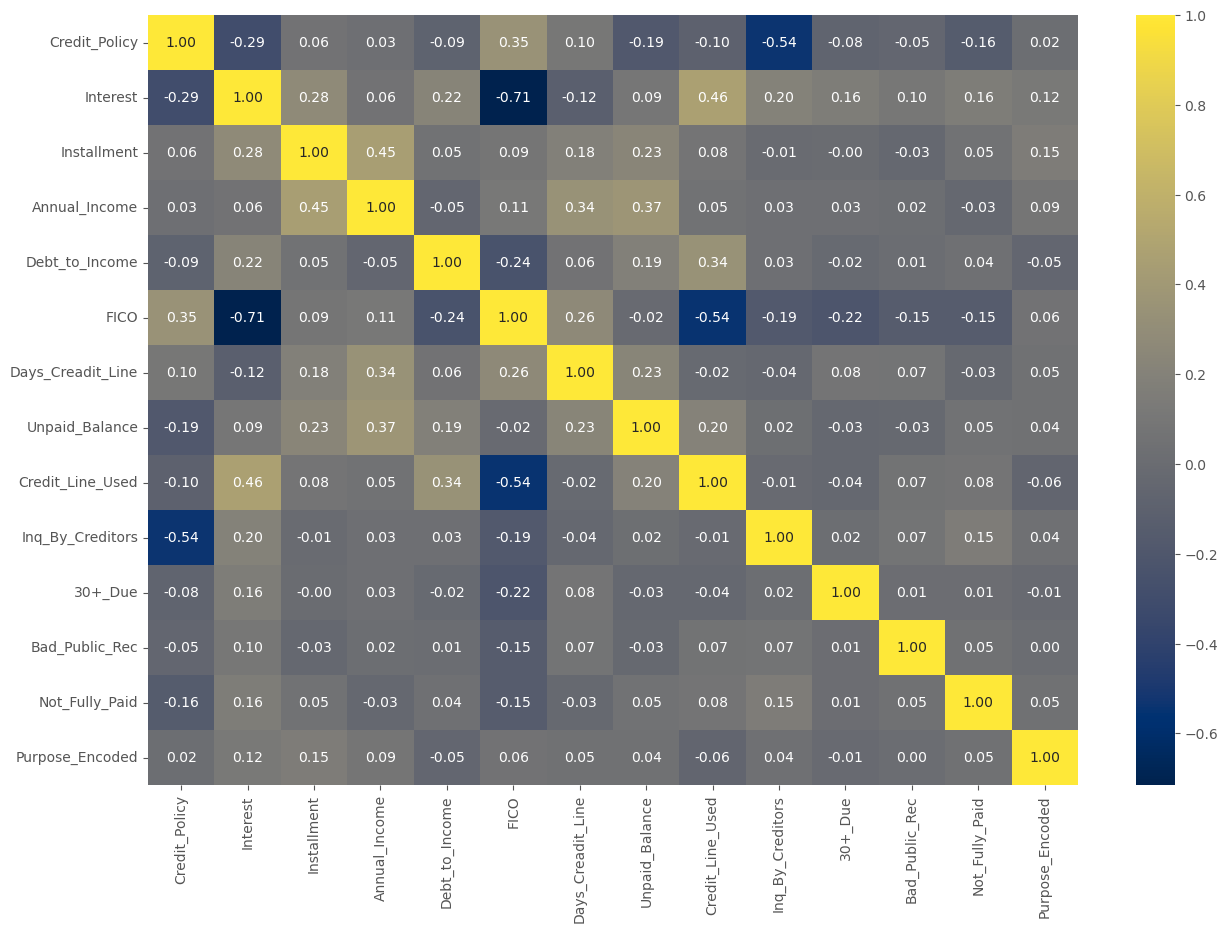

In [32]:
# Correlation Matrix

dropped_df = df.drop(['Purpose'], axis = 1)
corr_matrix = dropped_df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot = True, cmap = 'cividis', fmt = '.2f')


🔴 There is no strong correlation between most of the criteria, but we can observe some significant relationships between the following areas.

- Borrower's annual income and installments.
- The amount of the credit line used and interest rate.
- Number of days of credit line and annual income.
- Amount unpaid and annual income.
- The amount of the credit line used and debt-to-interest ratio.
- FICO score and credit policy.


#### PCA and K-Means Clustering.

In [103]:
# Selecting the most relevant columns for identifying investment risk

numerical_df = df[['Credit_Policy', 'Interest', 'Annual_Income', 'Debt_to_Income', 'FICO', 'Credit_Line_Used', '30+_Due', 'Purpose_Encoded', 'Not_Fully_Paid', 'Bad_Public_Rec']]
numerical_df.head()


,Credit_Policy,Interest,Annual_Income,Debt_to_Income,FICO,Credit_Line_Used,30+_Due,Purpose_Encoded,Not_Fully_Paid,Bad_Public_Rec
0,1,0.1189,11.350407,19.48,737,52.1,0,2,0,0
1,1,0.1071,11.082143,14.29,707,76.7,0,1,0,0
2,1,0.1357,10.373491,11.63,682,25.6,0,2,0,0
3,1,0.1008,11.350407,8.10,712,73.2,0,2,0,0
4,1,0.1426,11.299732,14.97,667,39.5,1,1,0,0


In [104]:
# Standardize numerical features

scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_df)
scaled_features

array([[ 0.49222226, -0.13931753,  0.68038804, ...,  0.03317632,
        -0.43652393, -0.23700318],
       [ 0.49222226, -0.57886837,  0.2440308 , ..., -0.55966463,
        -0.43652393, -0.23700318],
       [ 0.49222226,  0.48648368, -0.90865897, ...,  0.03317632,
        -0.43652393, -0.23700318],
       ...,
       [-2.03160257, -0.57886837, -0.54569448, ...,  0.03317632,
         2.29082517, -0.23700318],
       [-2.03160257,  1.39166043, -0.18272998, ...,  1.2188582 ,
         2.29082517, -0.23700318],
       [-2.03160257,  0.61685894,  0.54059439, ...,  0.03317632,
         2.29082517, -0.23700318]])

In [105]:
# Dimention reduction

pca = PCA(n_components = 2)
pca_output = pca.fit_transform(scaled_features)
pca_output

array([[-0.40214797, -0.64800486],
       [-0.01433393, -1.0722223 ],
       [ 0.0433234 , -0.30160402],
       ...,
       [ 1.5594675 ,  0.15592012],
       [ 1.52960771,  1.60490798],
       [ 1.2365375 ,  0.76259713]])

In [106]:
# Identifying the optimal number of clusters using the Elbow method

wcss = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, n_init= 10)    
    kmeans.fit(pca_output)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

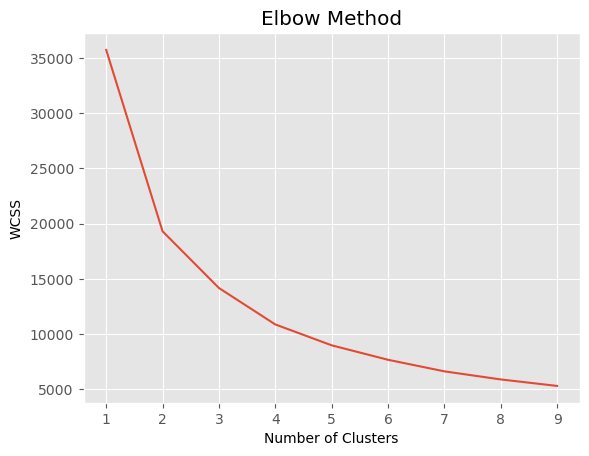

In [107]:
plt.plot(range(1, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

In [108]:
km = KMeans(n_clusters = 2, n_init=10)
y_predicted = km.fit_predict(pca_output)

In [109]:
pca_df = pd.DataFrame(pca_output, columns=['PCA1', 'PCA2'])
pca_df['cluster'] = y_predicted  
pca_df.head()

,PCA1,PCA2,cluster
0,-0.402148,-0.648005,1
1,-0.014334,-1.072222,0
2,0.043323,-0.301604,0
3,-0.527463,-0.202467,1
4,0.949362,0.325761,0


In [110]:
# Get cluster centers

km.cluster_centers_

array([[ 1.14490496, -0.03803408],
       [-1.49684395,  0.0497256 ]])

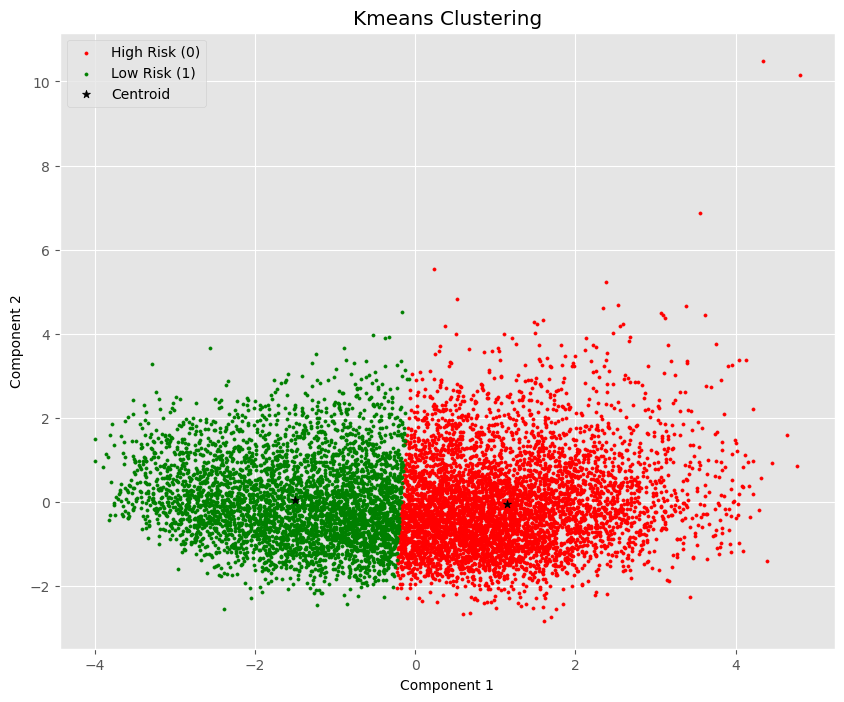

In [143]:
# Generating a scatterplot

cluster_df1 = pca_df[pca_df.cluster == 0]
cluster_df0 = pca_df[pca_df.cluster == 1]

plt.figure(figsize=(10, 8))
plt.scatter(cluster_df1.PCA1, cluster_df1['PCA2'], color = 'red', s = 5, label = 'High Risk (0)')
plt.scatter(cluster_df0.PCA1, cluster_df0['PCA2'], color = 'green', s = 5, label = 'Low Risk (1)')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'black', marker = '*', label = 'Centroid')
plt.title('Kmeans Clustering')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()


In [112]:
# Cluster population in percentage

cluster_value_counts = pca_df['cluster'].value_counts()
cluster_percetage = (cluster_value_counts / len(pca_df)) * 100
cluster_percetage

0    56.671539
1    43.328461
Name: cluster, dtype: float64

🔴 According to the clusters, 57% of the population is categorized as High risk, while 43% of the population is categorized as low risk for investors.

In [144]:
clustered_df = pd.DataFrame(numerical_df) 
clustered_df['Cluster'] = y_predicted

In [145]:
clustered_df.groupby('Cluster').mean()

,Credit_Policy,Interest,Annual_Income,Debt_to_Income,FICO,Credit_Line_Used,30+_Due,Purpose_Encoded,Not_Fully_Paid,Bad_Public_Rec
Cluster,,,,,,,,,,
0,0.69031,0.138710,10.909797,14.698174,686.148858,62.518508,0.237288,1.908622,0.223471,0.094510
1,0.95494,0.101621,10.961311,9.871104,743.149398,26.239186,0.067470,1.990361,0.077108,0.019759


🔴 Based on the figures derived from clustered data, it is evident that:

**0 - High Risk**
**1 - Low Risk**

- Borrowers categorized under "High Risk" exhibit:

    - A lower credit policy approval rate.
    - Higher interest rates.
    - Higher debt-to-income ratios.
    - Lower FICO scores.
    - Higher rates of 30+ due.
    - Higher amounts not fully paid.
    - Higher occurrences of bad public records.

- Borrowers categorized under "Low Risk" exhibit the completely opposite features compared to those listed above.

## 👉 Section 2 - Machine Learning

In this section, I have created predictions of loan default of borrowers based on various criteria derived from historical data of the LendingClub. I have utilized algorithms such as Random Forest Classifier, Support Vector Machine, and Logistic Regression with the best parameters available to achieve the highest possible prediction accuracy.

In [146]:
# Importing additional libraries

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [148]:
# Re-check the dataset for further observation

df.head()

,Credit_Policy,Purpose,Interest,Installment,Annual_Income,Debt_to_Income,FICO,Days_Creadit_Line,Unpaid_Balance,Credit_Line_Used,Inq_By_Creditors,30+_Due,Bad_Public_Rec,Not_Fully_Paid,Purpose_Encoded
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,2
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,2
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,2
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1


In [150]:
# Gain insight into the parameter 

df['Not_Fully_Paid'].value_counts()

0    8045
1    1533
Name: Not_Fully_Paid, dtype: int64

### Train and Test Spliting 

In [151]:
# Separates the dataset into two partsY

x = df.drop(['Not_Fully_Paid', 'Purpose'], axis = 1)
y = df['Not_Fully_Paid']

In [152]:
# Data splitting

xtrain, xtest, ytrain, ytest = train_test_split(x , y, test_size = 0.2, random_state = 42)

In [153]:
# Feature scaling

sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.fit_transform(xtest)

### Model Building

**Utilizing Random Forest Classifier Model**

In [154]:
# Creates an instance with 200 decision trees

rfc = RandomForestClassifier(n_estimators = 200)

In [155]:
# Train the RFC model

rfc.fit(xtrain, ytrain)

RandomForestClassifier(n_estimators=200)

In [156]:
# Calculates the accuracy of the RFC model on the test data 

rfc.score(xtest, ytest)

0.8408141962421712

🔴 Using the Random Forest algorithm, it achieves an **84%** accuracy rate. While this rate may be plausible, it's important to note that we only used 200 parameters to generate this value. Consequently, the prediction may be prone to overfitting or underfitting.

- Down below we evaluate the performance of this model more robustly using Cross Validation Score

In [157]:
# Estimate the average accuracy of the RFC

rfc1 = cross_val_score(estimator = rfc, X = xtrain, y = ytrain, cv = 10)
rfc1.mean()

0.8389449246155889

🔴 Cross-validation gives an accuracy of 83% while the normal random forest method gives 84%, it suggests that the model's performance might be slightly overestimated when using the single train-test split compared to cross-validation. This idicates that this model consistently provides an 83% accuracy rate in all other cases.

**Utilizing Support Vector Machine Model**

In [158]:
# Train a SVC model and evaluate its performance on a test set

sv = SVC()
sv.fit(xtrain, ytrain)
sv.score(xtest, ytest)

0.8402922755741128

🔴 RFC and the SVC provide the same accuracy of 84%, this means that they are performing equally well on the test data in terms of classification accuracy. 

In [159]:
# Performs hyperparameter tuning for the SVC using Grid Search Cross-Validation

model = GridSearchCV(sv, {
    'C':[0.1, 0.2, 0.4, 0.8, 1.2, 1.8, 4.0, 7.0],
    'gamma': [0.1, 0.4, 0.8, 1.0, 2.0, 3.0],
    'kernel': ['rbf', 'linear']
}, scoring = 'accuracy', cv = 10)

In [160]:
# Fit the GridSearchCV object to the training data

model.fit(xtrain, ytrain)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.2, 0.4, 0.8, 1.2, 1.8, 4.0, 7.0],
                         'gamma': [0.1, 0.4, 0.8, 1.0, 2.0, 3.0],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [161]:
# Getting the best hyperparameters found during the grid search

model.best_params_

{'C': 1.2, 'gamma': 0.1, 'kernel': 'rbf'}

In [162]:
# Creates an SVC model with specific hyperparameters, trains and evaluates its performance on the test data

model2 = SVC(C = 1.2, gamma = 0.1, kernel = 'rbf')
model2.fit(xtrain, ytrain)
model2.score(xtest, ytest)

0.8402922755741128

🔴 Both models perform similarly well on the given dataset. Achieving similar performance with different algorithms provides confidence in the predictive capabilities of the models.

**Utilizing Logistic Regression Model**

In [163]:
# Trains a LR model on the training data and then evaluates its performance

lr = LogisticRegression()
lr.fit(xtrain, ytrain)
lr.score(xtest, ytest)

0.8402922755741128

🔴 LR generates the exact same accuracy as support SVC **(0.8402922755741128)**, it suggests that both models are performing equally well on the given dataset in terms of predictive accuracy.

**Creating Heatmap to gain insights into the performance of the LR model and the relationships between features and predictions**  

<Axes: >

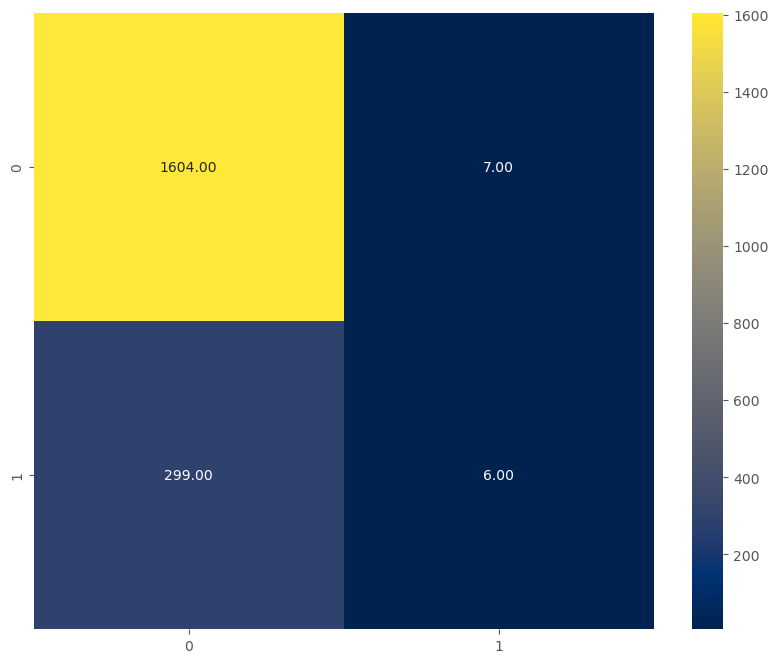

In [164]:
plr = lr.predict(xtest)
cm = confusion_matrix(ytest, plr)
fig, ax = plt.subplots(figsize = (10, 8))
sns.heatmap(cm, ax = ax, annot = True, cmap = 'cividis', fmt = '.2f')

🔴 The position (0, 0) with the highest value represents the lightest section of the heat map, indicating the highest prediction accuracy. In this context, lighter colors correspond to better accuracy.

## 👉 Section 3 - Conclusion, and Suggestions

#### Conclusion

Based on the exploratory data analysis, it was evident that specific trends and characteristics exist among these groups. This information provides valuable insights for investors who are planning to build a diverse portfolio and mitigate the risk of potential losses.

Additionally, the machine learning model predicted the possible default borrowers with an accuracy of 84% based on the historical dataset used to train the model. This is advantageous for uncovering potential risks in the future and identifying hidden risks in live data.

#### Suggestions

According to the data, nearly 16% of borrowers have not settled their loans fully. However, given the nature of the industry and this particular business type, there is a higher risk of fraud and theft. Therefore, developing a fraud detection machine learning program would be highly advantageous to mitigate the risk and minimize the number of non-fully settled customers in the future.

Thanks for your time. </br>
Created by Rasintha